In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
train = pd.read_csv("..\\data\\train.csv")
train.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [21]:
grp_model_a = train.groupby(['model_a']).sum()
grp_model_a['winner_model_a']

model_a
RWKV-4-Raven-14B    146
alpaca-13b          180
chatglm-6b          106
chatglm2-6b          35
chatglm3-6b          84
                   ... 
wizardlm-13b        275
wizardlm-70b        272
yi-34b-chat         237
zephyr-7b-alpha      55
zephyr-7b-beta      352
Name: winner_model_a, Length: 64, dtype: int64

In [22]:
grp_model_b = train.groupby(['model_b']).sum()
grp_model_b['winner_model_b']

model_b
RWKV-4-Raven-14B    119
alpaca-13b          176
chatglm-6b          111
chatglm2-6b          38
chatglm3-6b          73
                   ... 
wizardlm-13b        297
wizardlm-70b        316
yi-34b-chat         294
zephyr-7b-alpha      64
zephyr-7b-beta      362
Name: winner_model_b, Length: 64, dtype: int64

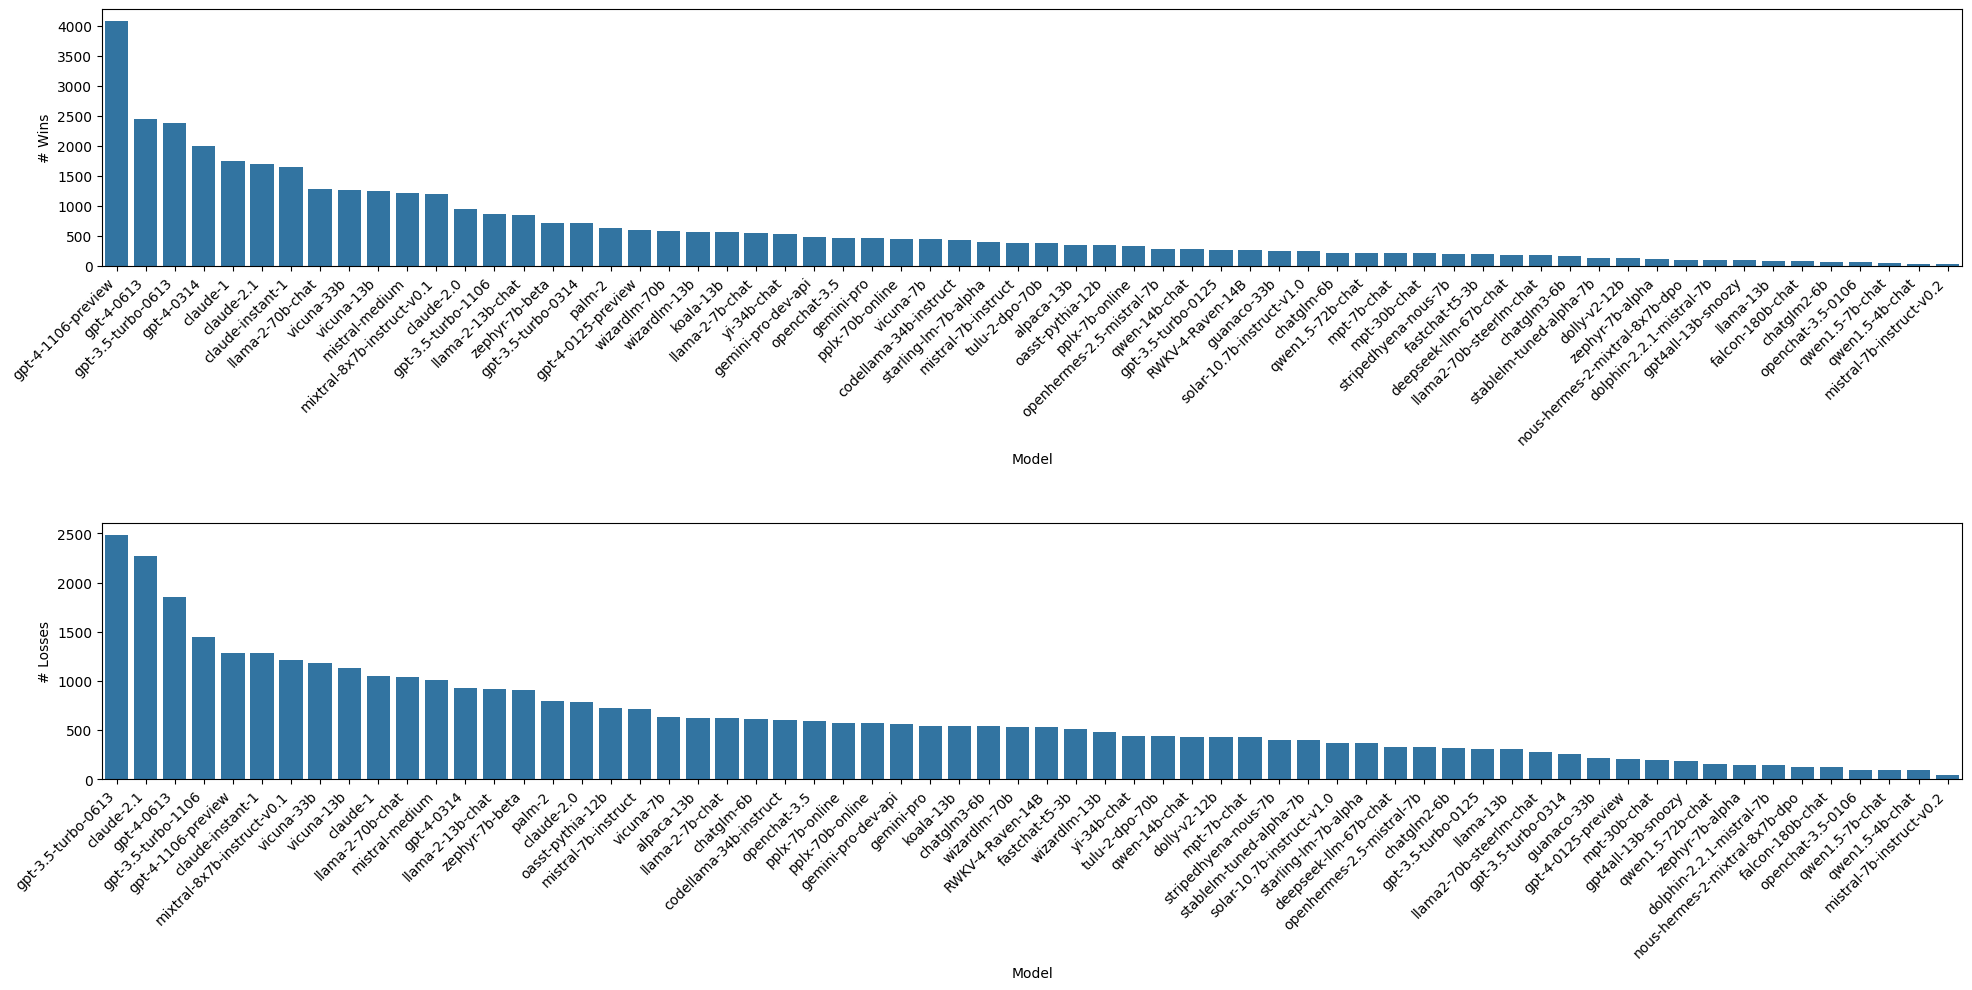

In [78]:
nr_wins = grp_model_a['winner_model_a'] + grp_model_b['winner_model_b']
nr_wins.sort_values(ascending=False, inplace=True)

nr_losses = grp_model_a['winner_model_b'] + grp_model_b['winner_model_a']
nr_losses.sort_values(ascending=False, inplace=True)

nr_ties = grp_model_a['winner_tie'] + grp_model_b['winner_tie']
nr_ties.sort_values(ascending=False, inplace=True)


fig, axes = plt.subplots(3, figsize=(24,10))
fig.subplots_adjust(hspace=1)

sns.barplot(nr_wins, ax=axes[0])
axes[0].set_xticks(axes[0].get_xticks(), axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('# Wins')

sns.barplot(nr_losses, ax=axes[1])
axes[1].set_xticks(axes[1].get_xticks(), axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('# Losses')


sns.barplot(nr_ties, ax=axes[2])
axes[2].set_xticks(axes[2].get_xticks(), axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('# Losses')



plt.show()

In [81]:
# Get win percentages
nr_ties


model_a
RWKV-4-Raven-14B    359
alpaca-13b          421
chatglm-6b          435
chatglm2-6b         171
chatglm3-6b         294
                   ... 
wizardlm-13b        525
wizardlm-70b        522
yi-34b-chat         474
zephyr-7b-alpha     145
zephyr-7b-beta      777
Name: winner_tie, Length: 64, dtype: int64